In [61]:
"""
カラーマップと折れ線グラフの保存場所の作成
"""
import os

IMG_DIR = 'images'
COLORMAP_DIR = 'images/colormap/'
LINE_DIR = 'images/line/'

# もしフォルダがなければ画像を置いておくフォルダを作成
if not os.path.exists(IMG_DIR):
  os.mkdir(IMG_DIR)
  os.mkdir(COLORMAP_DIR)
  os.mkdir(LINE_DIR)

datas/sample\0.csvを作成
datas/sample\1.csvを作成
datas/sample\2.csvを作成
datas/sample\3.csvを作成
datas/sample\4.csvを作成


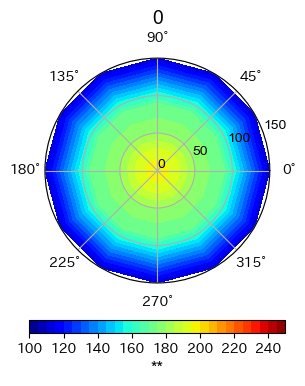

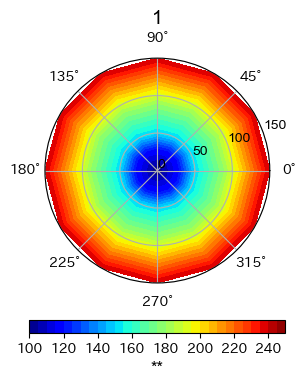

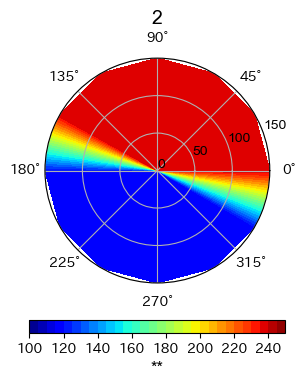

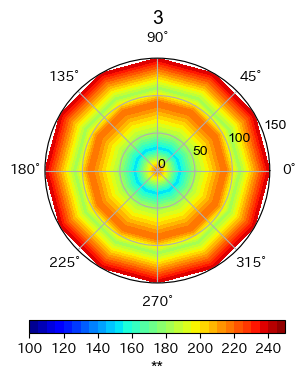

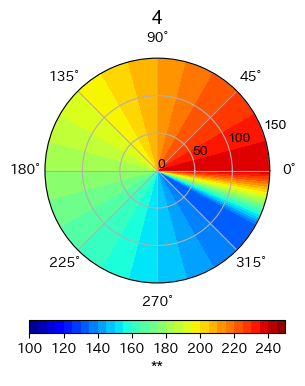

In [62]:
"""
サンプルデータの取得→カラーマップ作成・保存
"""
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import japanize_matplotlib

# 定数設定
INPUT_SAMPLE_DATE_DIR = 'datas/sample' # 元データを置いておくルートディレクトリ
COLORMAP_DIR = 'images/colormap/' # カラーマップを保存するディレクトリ

def get_file_names(set_dir_name):
    """
    ディレクトリ内のファイル名取得（ファイル名のみの一覧を取得）
    """
    file_names = os.listdir(set_dir_name)
    temp_full_file_names = [os.path.join(set_dir_name, file_name) for file_name in file_names if os.path.isfile(os.path.join(set_dir_name, file_name))] # ファイルかどうかを判定
    return temp_full_file_names

def make_colormap_img(target_full_file_names):
    """
    カラーマップの作成と保存
    """
    target_full_file_names.sort() # ファイル名でソート
    for target_file in target_full_file_names:
            print( target_file + 'を作成')
            basename = os.path.splitext(os.path.basename(target_file))[0] # ファイル名の部分のみを取得
            df = pd.read_csv(target_file, names=("theta", "radii", "z_value"),header=0) # csvを読み込み
            df = df.sort_values(by=["theta", "radii"]) # theta, radiiの順にソート
            x = np.array(sorted(set(df.theta*np.pi/180))) # 角度をラジアンに変換後setで重複を除いたのち、ソートする
            y = np.array(sorted(set(df.radii))) # setで重複を除いたのち、ソートする
            z = np.array(df.z_value)
            X, Y = np.meshgrid(x, y) # グリッドデータを生成
            Z = z.reshape(len(x), -1).T # グリッド上のデータ値（Z）を定義する
            
            plt.rcParams["figure.figsize"] = [3,4]
            plt.figure()
            ax = plt.subplot(111, polar=True) # axesの設定
            ax.set_rgrids(np.linspace(0, 150, 4), angle=20, fontname="Arial", fontsize=10) # グリッド作成
            ax.set_title(basename, fontname="Arial", fontsize=14) # タイトル作成
            ctf = ax.contourf(X, Y, Z, levels=np.linspace(100,250,31), vmin=100, vmax=250, cmap="jet") # コンター（カラーマップ）
            colb = plt.colorbar(ctf, pad=0.12, orientation="horizontal", shrink=1.1) # カラーバー
            colb.set_label("**", fontname="Arial", fontsize=12) # カラーバーのラベル
            # 指定の場所に保存
            plt.savefig(fname=COLORMAP_DIR+basename+".jpg", facecolor="white", bbox_inches='tight', pad_inches=0.05)

f_names = get_file_names(INPUT_SAMPLE_DATE_DIR) # ファイル名取得
make_colormap_img(f_names)

datas/sample\0.csvを作成
datas/sample\1.csvを作成
datas/sample\2.csvを作成
datas/sample\3.csvを作成
datas/sample\4.csvを作成


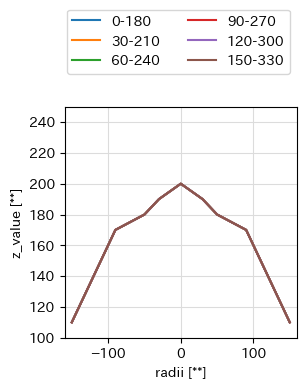

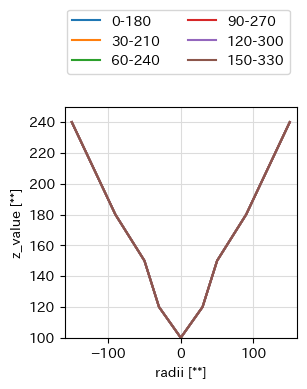

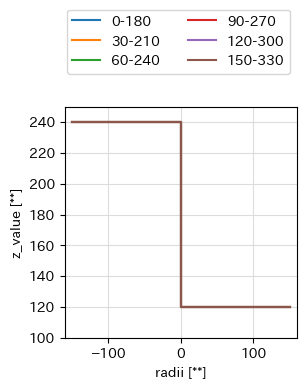

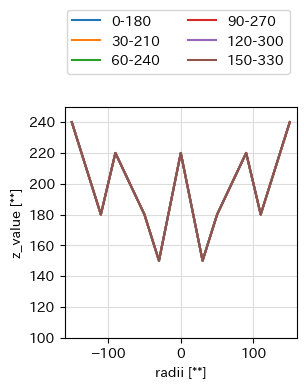

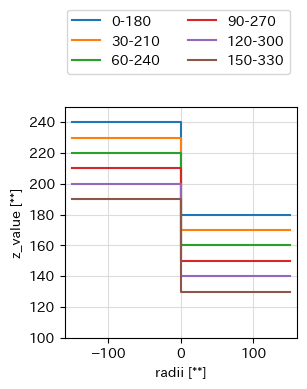

<Figure size 300x300 with 0 Axes>

In [63]:
"""
サンプルデータの取得→折れ線グラフ作成
"""
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# 定数設定
INPUT_SAMPLE_DATE_DIR = 'datas/sample' # データを置いておくルートディレクトリ
LINE_DIR = 'images/line/'

def get_file_names(set_dir_name):
    """
    ディレクトリ内のファイル名取得（ファイル名のみの一覧を取得）
    """
    file_names = os.listdir(set_dir_name)
    temp_full_file_names = [os.path.join(set_dir_name, file_name) for file_name in file_names if os.path.isfile(os.path.join(set_dir_name, file_name))] #  ファイルかどうかを判定
    return temp_full_file_names

def make_line_img(target_full_file_names):
    """
    グラフの作成と保存
    """
    target_full_file_names.sort() # ファイル名でソート
    for target_file in target_full_file_names:
            print( target_file + 'を作成')
            basename = os.path.splitext(os.path.basename(target_file))[0] # ファイル名の部分だけを取得
            df = pd.read_csv(target_file, names=("theta", "radii", "z_value"),header=0) # csvを読み込み
            df = df.sort_values(by=["theta", "radii"]) # theta, radiiの順にソート
            thetas = np.array(sorted(set(df.theta))) # setで重複を除いたのち、ソート
            df_i = df.set_index(df.theta) # thetaでインデックス化
            for a_theta in thetas:
                d = dict()
                d[a_theta] = df_i.loc[a_theta]  # a_thetaをの要素を抽出
                d[a_theta] = d[a_theta].sort_values(by=["radii"], ascending=False) # radii(半径)でソートして再代入
                if a_theta < 180: # 180degより小さい時のみ処理
                    plus180 = a_theta + 180
                    d[plus180] = df_i.loc[plus180] # a_theta+180degの要素を抽出
                    d[plus180] = d[plus180].sort_values(by=["radii"]) # radii(半径)でソートして再代入
                    x0 = -d[a_theta].radii # 180degより小さいときradii(半径)にマイナスをかける（0°<=(この領域をマイナス半径とする)<180°）
                    x180 = +d[plus180].radii # 180deg以上のときradii(半径)はそのまま
                    y0 = d[a_theta].z_value
                    y180 = d[plus180].z_value
                    x = np.hstack([x0,x180]) # 円の中心を通る一直線分のradiiを結合する
                    y = np.hstack([y0,y180]) # 円の中心を通る一直線分のz_valueを結合する
                    label = str(a_theta) + '-' + str(plus180)
                    plt.rcParams["figure.figsize"] = [3,3] # 画像サイズを調整
                    plt.xlabel("radii [**]", fontsize=10)
                    plt.ylabel("z_value [**]", fontsize=10)
                    plt.xlim(-160,160) # x軸範囲指定
                    plt.ylim(100,250) # y軸範囲指定
                    plt.plot(x,y,label=label)
                    plt.grid(c='gainsboro', zorder=9)
                    plt.legend(bbox_to_anchor=(1, 1.45), ncol=2)
                          
            # 指定の場所に保存
            plt.savefig(fname=LINE_DIR+basename+"_line.jpg", facecolor="white", bbox_inches='tight', pad_inches=0.05)
            plt.figure()

f_names = get_file_names(INPUT_SAMPLE_DATE_DIR) # ファイル名取得
make_line_img(f_names)

In [64]:
"""
result.xslxに画像の貼り付け
"""
import os
import glob
import imghdr
import openpyxl
import cv2

# 定数設定
IMG_DIR = 'images' # 貼り付ける画像を置いておくルートディレクトリ（フォルダ）
SHEET_TITLE = 'result' # シート名の設定
RESULT_FILE_NAME = 'result.xlsx' # 結果を保存するファイル名
 
# 変数
max_width = [] # 各行の画像の高さの最大値を保持

def get_file_names(set_dir_name):
    """
    ディレクトリ内のファイル名取得（ファイル名のみの一覧を取得）
    """
    file_names = os.listdir(set_dir_name)
    temp_full_file_names = [os.path.join(set_dir_name, file_name) for file_name in file_names if os.path.isfile(os.path.join(set_dir_name, file_name))] # ファイルかどうかを判定
    return temp_full_file_names
 
def attach_img(target_full_file_names, set_row_idx, set_dir_name):
    """
    画像を呼び出して、Excelに貼り付け
    """
    set_column_idx = 1
    ws.cell(row=set_row_idx, column=1).value = set_dir_name # 各列の1行目に、貼り付ける画像があるフォルダ名を入力
    max_height = 0 # 画像の高さの最大値を保持するための変数
    target_full_file_names.sort() # ファイル名でソート
    for target_file in target_full_file_names:
        if imghdr.what(target_file) != None: # 画像ファイルかどうかの判定
            img = openpyxl.drawing.image.Image(target_file)
            column_letter = ws.cell(row=set_row_idx, column=set_column_idx+1).coordinate[:-1] # セルの行列番号から、そのセルの列番号の文字列を取得。最後の1文字は消す。
            print('[' + str(column_letter) + '][' + str(set_row_idx) + ']' + target_file + 'を貼り付け')
 
            # 画像のサイズを取得して、セルの大きさを合わせる（画像同士が重ならないようにするため）
            size_img = cv2.imread(target_file)
            height, width = size_img.shape[:2]
            if max_height < height:
                max_height = height
            if not max_width[set_column_idx-1:set_column_idx]: # 配列「max_width」において、「set_column_idx」番目の要素が存在しなければ、挿入
                max_width.insert(set_column_idx-1, width)
            if max_width[set_column_idx-1] < width:
                max_width[set_column_idx-1] = width
            ws.row_dimensions[set_row_idx].height = max_height * 0.75
            ws.column_dimensions[column_letter].width = max_width[set_column_idx-1] * 0.13
            ws.column_dimensions['A'].width = 25
            
            cell_address = ws.cell(row=set_row_idx, column=set_column_idx+1).coordinate # セルの行列番号から、そのセルの番地を取得
            img.anchor = cell_address
            ws.add_image(img) # シートに画像貼り付け
        set_column_idx += 1

# ワークブック設定
wb = openpyxl.Workbook()
ws = wb.worksheets[0] # 1番目のシートを編集対象にする
ws.title = SHEET_TITLE # 1番目のシートに名前を設定
 
# 貼り付ける画像を置いておくディレクトリ内のディレクトリ名を再帰的に取得
dirs = glob.glob(os.path.join(IMG_DIR, '**' + os.sep), recursive=True)
 
row_idx = 1
# 各ディレクトリについて操作
for dir_name in dirs:
    f_names = get_file_names(dir_name) # ファイル名取得
    attach_img(f_names, row_idx, dir_name) # 画像貼り付け設定
    row_idx += 1 # 次の列へ・・・
 
# ファイルへの書き込み
wb.save(RESULT_FILE_NAME)

[B][2]images\colormap\0.jpgを貼り付け
[C][2]images\colormap\1.jpgを貼り付け
[D][2]images\colormap\2.jpgを貼り付け
[E][2]images\colormap\3.jpgを貼り付け
[F][2]images\colormap\4.jpgを貼り付け
[B][3]images\line\0_line.jpgを貼り付け
[C][3]images\line\1_line.jpgを貼り付け
[D][3]images\line\2_line.jpgを貼り付け
[E][3]images\line\3_line.jpgを貼り付け
[F][3]images\line\4_line.jpgを貼り付け
